# Image Classification with CNN  

이번 실습에서는 CNN을 이용해 MNIST 데이터셋의 필기체 숫자들을 분류하는 image classification task를 다루어 보도록 하겠습니다.  

이번 실습을 통해 CNN이 추출해 내는 Feature가 classification task가 어떻게 규정되느냐에 따라 어떤 방식으로 다르게 추출되는지를 확인해 보고자 합니다.  

(참고)  
https://github.com/gilbutITbook/006975/blob/master/5.1-introduction-to-convnets.ipynb  
https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6  
https://www.kaggle.com/adityaecdrid/mnist-with-keras-for-beginners-99457  
https://3months.tistory.com/150

In [29]:
from collections import Counter
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras.datasets import mnist
from keras.utils import to_categorical

import json

import matplotlib.pyplot as plt #for plotting
%matplotlib inline

### Prepare MNIST Dataset for CNN   

keras에서 제공하는 MNIST 데이터셋을 로딩해 봅시다.

In [2]:
# to reproduce same training result
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

In [4]:
x_train.shape

(54000, 28, 28)

In [5]:
x_train.shape

(54000, 28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,  19,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 153, 247,  57,   0,
          0,   0],
       [  

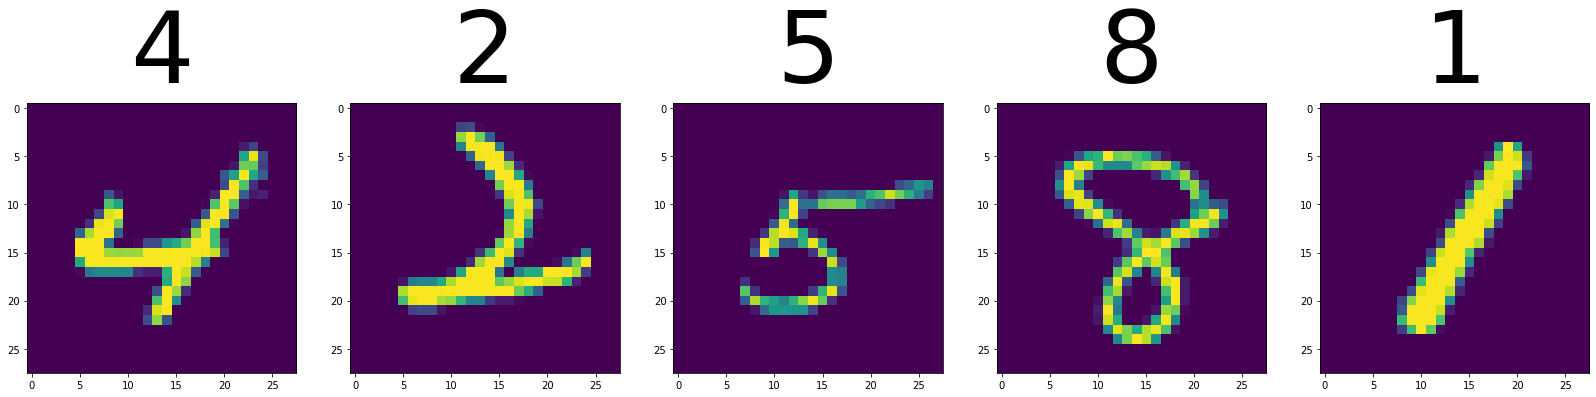

In [7]:
plt.figure(figsize=(28,28))
for i in range(5):  
    plt.subplot(1, 5, i+1)
    plt.title(y_train[i], fontsize=100)
    plt.imshow(x_train[i])
# plt.show()

In [8]:
y_train[0]

4

In [9]:
type(x_train)

numpy.ndarray

In [10]:
type(x_test)

numpy.ndarray

In [11]:
counter_train = Counter(y_train)
counter_train

Counter({4: 5267,
         2: 5356,
         5: 4875,
         8: 5275,
         1: 6046,
         3: 5495,
         6: 5291,
         9: 5388,
         7: 5641,
         0: 5366})

In [12]:
counter_test = Counter(y_test)
counter_test

Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

In [13]:
input_shape = (x_train.shape[1], x_train.shape[2], 1)
input_shape

(28, 28, 1)

In [14]:
x_train_shape = (-1,) + input_shape
x_train_shape

(-1, 28, 28, 1)

CNN의 입력으로 사용하기 위해서는 Input data의 shape가 (batch, witdh, height, channel)이어야 합니다.  
이번 실습에서는 (60000, 28, 28, 1)이 적당합니다.

In [15]:
x_train = x_train.reshape(x_train_shape)
x_val = x_val.reshape(x_train_shape)
x_test = x_test.reshape(x_train_shape)

In [16]:
x_train.shape

(54000, 28, 28, 1)

In [17]:
# Input Normalization
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 주의!! 이 박스가 두번 이상 실행되지 않도록 주의할 것.

In [18]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [19]:
# label to one-hot encoding
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [20]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## Create the Convolutional Neural Network

In [21]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = input_shape))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (7,7),padding = 'Same', activation ='relu'))
model.add(Dropout(0.25))

# model.add(Dense(10, activation = "softmax"))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)    

In [22]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

## model training with fit_generator

In [23]:
# make data generator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [24]:
# Fit the model with model.fit_generator
epochs = 5 
batch_size = 64

history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 15s - loss: 0.2573 - acc: 0.9177 - val_loss: 0.0618 - val_acc: 0.9808
Epoch 2/5
 - 12s - loss: 0.0857 - acc: 0.9732 - val_loss: 0.0553 - val_acc: 0.9832
Epoch 3/5
 - 12s - loss: 0.0717 - acc: 0.9789 - val_loss: 0.0389 - val_acc: 0.9897
Epoch 4/5
 - 12s - loss: 0.0605 - acc: 0.9821 - val_loss: 0.0311 - val_acc: 0.9908
Epoch 5/5
 - 12s - loss: 0.0580 - acc: 0.9830 - val_loss: 0.0358 - val_acc: 0.9892


In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

10000/10000 [==============================] - 1s 85us/step


0.9937

## save trained model

In [26]:
model_json = model.to_json()
with open("checkpoints/cnn_model.json", "w") as json_file : 
    json.dump(model_json, json_file)

In [27]:
model.save_weights("checkpoints/cnn_model.h5")

In [30]:
keras.backend.clear_session()